# Error Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [2]:
# Adapt these paths for analysing other results
results_regression = "../results/regression_5_scores/BASELINE_MEAN.csv"
#results_regression = "../results/regression_5_scores/predicate_#semrole_#verb-semrole_#verbarg-struct_.csv"
results_classification = "../results/classification_2_classes/BASELINE_MF.csv"
#results_classification = "../results/classification_3_classes/BASELINE_MF.csv"

# Adapt depending on which classification task you're evaluating
class_type = "class_binary"
#class_type = "class_tertiary"

# Get name of system
regression_system = os.path.basename(results_regression).split(".")[0]
classification_system = os.path.basename(results_classification).split(".")[0]

In [3]:
# Create output folder
figures_tables = "../results/figures_and_tables"
if not os.path.exists(figures_tables):
    os.makedirs(figures_tables)

### 1. Regression results

In [4]:
# Read data
df = pd.read_csv(results_regression, sep="\t")
df.rename(columns={"label": "gold", "role_label": "semantic role"}, inplace=True)

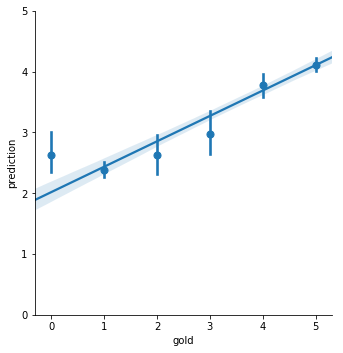

In [5]:
sns_plot = sns.lmplot(x="gold", y="prediction", data=df, x_estimator=np.mean)
plt.ylim(0, 5)
plt.show()
fig_file = os.path.join(figures_tables, f"results_plot_{regression_system}.pdf")
sns_plot.savefig(fig_file) 

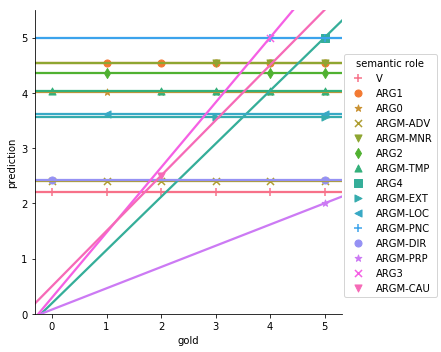

In [6]:
sns_plot = sns.lmplot(x="gold", y="prediction", data=df, x_estimator=np.mean, hue="semantic role", ci=None, 
                      markers=['+','o','*','x','v','d','^','s','>','<','+','o','*','x','v'])
plt.ylim(0, 5.5)
plt.show()
fig_file = os.path.join(figures_tables, f"results_plot_roles_{regression_system}.pdf")
sns_plot.savefig(fig_file) 

### 2. Classification results

In [7]:
# Read data
df = pd.read_csv(results_classification, sep="\t")
#df['class_tertiary'] = df['class_tertiary'].map({0: "FALSE", 1: "UNCERTAIN", 2:"TRUE"})
#df['class_binary'] = df['class_binary'].map({0: "FALSE", 1: "TRUE"})
df = df[["role_label", "label", class_type, "prediction", "positive_interpretation", "negation"]]
df.head()

,role_label,label,class_binary,prediction,positive_interpretation,negation
0,V,1,0,0,"A small farmer and a seaport merchant could be {some verb / action / state} by the same spokesman, they said, /but not 'represented'/","A small farmer and a seaport merchant could not be represented by the same spokesman, they said."
1,ARG1,4,1,1,"{someone / some people / something} could be represented by the same spokesman, they said, /but not 'A small farmer and a seaport merchant'/","A small farmer and a seaport merchant could not be represented by the same spokesman, they said."
2,ARG0,5,1,1,"A small farmer and a seaport merchant could be represented {by someone / some people / something}, they said, /but not 'by the same spokesman'/","A small farmer and a seaport merchant could not be represented by the same spokesman, they said."
3,V,5,1,0,"{some verb / action / state} the Tatun Mountains, which shelter the town, /but not 'forget'/","Do n't forget the Tatun Mountains, which shelter the town."
4,ARG1,5,1,1,"Forget {someone / some people / something}, /but not 'the Tatun Mountains, which shelter the town'/","Do n't forget the Tatun Mountains, which shelter the town."


In [8]:
# Select only those that were incorrectly predicted
incorrect = df.loc[df["prediction"] != df[class_type]].sort_values(["role_label"])
outfilename = os.path.join(figures_tables, f"errors_classification_{class_type}_{classification_system}.csv")
incorrect.to_csv(outfilename, sep="\t", index=False)
incorrect

,role_label,label,class_binary,prediction,positive_interpretation,negation
148,ARG0,2,0,1,"{someone / some people / something} can talk without me, /but not 'I'/",I ca n't talk without me/.
208,ARG0,1,0,1,"{someone / some people / something} can light a fire with a wet match, /but not 'You'/",You can not light a fire with a wet match
209,ARG1,2,0,1,"You can light {someone / some people / something} with a wet match, /but not 'a fire'/",You can not light a fire with a wet match
257,ARG1,1,0,1,"But while the Composite gained 1.19, to 462.89, many issues participated {in someone / some people / something}, /but not 'in the advance'/","But while the Composite gained 1.19, to 462.89, many issues did n't participate in the advance."
190,ARG1,1,0,1,"Global warming will keep {someone / some people / something} cozy over the next few months, though, /but not 'you'/","Global warming wo n't keep you cozy over the next few months, though."
252,ARG1,2,0,1,"She actually brought {someone / some people / something} into the deliberation room, /but not 'it'/",She did n't actually bring it into the deliberation room/.
304,ARG1,1,0,1,"Stadiums tend to redistribute existing wealth within a community, create {someone / some people / something}, /but not 'more of it'/","Stadiums tend to redistribute existing wealth within a community, not create more of it."
290,ARG2,1,0,1,"I fault the landowners {for someone / some people / something / somewhere}, /but not 'for trying'/",I do n't fault the landowners for trying.
255,ARGM-ADV,5,1,0,"But {ARGM-ADV}, many issues participated in the advance, /but not 'while the Composite gained 1.19, to 462.89'/","But while the Composite gained 1.19, to 462.89, many issues did n't participate in the advance."
231,ARGM-ADV,4,1,0,"The administration {ARGM-ADV} seems inclined to take the initiative, /but not 'certainly'/",The administration certainly does n't seem inclined to take the initiative.


In [9]:
# Count errors per semantic role
roles = incorrect.groupby(['role_label', class_type, "prediction"]).size().reset_index(name='size')
csv_file = os.path.join(figures_tables, f"errors_summary_roles_{class_type}_{classification_system}.csv")
roles.to_csv(csv_file, index=False, sep="\t")
roles

,role_label,class_binary,prediction,size
0,ARG0,0,1,2
1,ARG1,0,1,5
2,ARG2,0,1,1
3,ARGM-ADV,1,0,10
4,ARGM-DIR,1,0,1
5,ARGM-LOC,0,1,1
6,ARGM-PRP,1,0,1
7,ARGM-TMP,0,1,3
8,V,1,0,39
